ML-svm-knn-Lr-Lr assessment

load ML-modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

load the dataset

In [2]:
df = pd.read_csv("/Users/apple/Downloads/SoftwareDefectDataset.csv")
df.head()

,LOC,CYCLO,LENGTH,VOLUME,DIFFICULTY,INT_FAN_IN,INT_FAN_OUT,NUM_OPERATORS,NUM_OPERANDS,BRANCH_COUNT,DEFECT_LABEL
0,0.779239,0.478261,0.274048,0.544918,0.564121,0.222222,0.444444,0.736196,0.807377,0.642857,0
1,0.595156,0.608696,0.742561,0.758597,0.450649,0.222222,0.000000,0.576687,0.200820,0.142857,0
2,0.895502,0.000000,0.968166,0.754277,0.672996,1.000000,0.000000,0.116564,0.020492,0.000000,1
3,0.782007,0.565217,0.164706,0.017766,0.584106,0.000000,1.000000,0.615542,0.481557,0.500000,0
4,0.757785,0.217391,0.560900,0.126125,0.526050,0.555556,0.222222,0.656442,0.655738,0.857143,1


Basic EDA

In [3]:
df.shape

(1000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LOC            1000 non-null   float64
 1   CYCLO          1000 non-null   float64
 2   LENGTH         1000 non-null   float64
 3   VOLUME         1000 non-null   float64
 4   DIFFICULTY     1000 non-null   float64
 5   INT_FAN_IN     1000 non-null   float64
 6   INT_FAN_OUT    1000 non-null   float64
 7   NUM_OPERATORS  1000 non-null   float64
 8   NUM_OPERANDS   1000 non-null   float64
 9   BRANCH_COUNT   1000 non-null   float64
 10  DEFECT_LABEL   1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [5]:
df.describe()

,LOC,CYCLO,LENGTH,VOLUME,DIFFICULTY,INT_FAN_IN,INT_FAN_OUT,NUM_OPERATORS,NUM_OPERANDS,BRANCH_COUNT,DEFECT_LABEL
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.520711,0.493304,0.509783,0.505971,0.502349,0.503556,0.510667,0.493988,0.512625,0.514643,0.326000
std,0.289402,0.301158,0.289705,0.291389,0.284572,0.315975,0.321400,0.295131,0.276572,0.314337,0.468982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.278720,0.217391,0.255017,0.252619,0.262725,0.222222,0.222222,0.231084,0.280738,0.214286,0.000000
50%,0.531834,0.478261,0.513841,0.522552,0.511328,0.555556,0.555556,0.494888,0.517418,0.571429,0.000000
75%,0.767474,0.739130,0.761678,0.759446,0.750681,0.777778,0.777778,0.756646,0.742828,0.785714,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.columns

Index(['LOC', 'CYCLO', 'LENGTH', 'VOLUME', 'DIFFICULTY', 'INT_FAN_IN',
       'INT_FAN_OUT', 'NUM_OPERATORS', 'NUM_OPERANDS', 'BRANCH_COUNT',
       'DEFECT_LABEL'],
      dtype='object')

In [7]:
df.isnull().sum()

LOC              0
CYCLO            0
LENGTH           0
VOLUME           0
DIFFICULTY       0
INT_FAN_IN       0
INT_FAN_OUT      0
NUM_OPERATORS    0
NUM_OPERANDS     0
BRANCH_COUNT     0
DEFECT_LABEL     0
dtype: int64

EDA - visulize

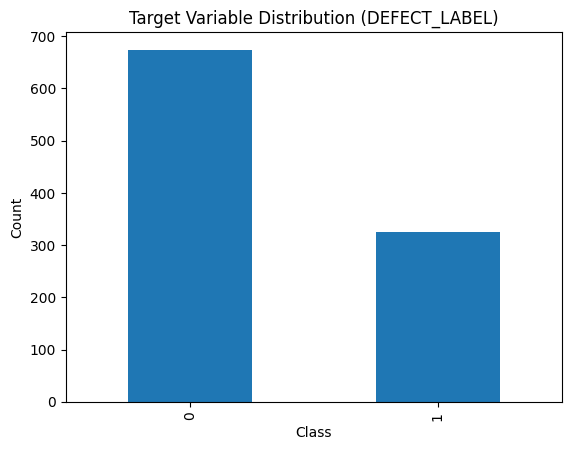

In [8]:
df["DEFECT_LABEL"].value_counts().plot(kind='bar')
plt.title("Target Variable Distribution (DEFECT_LABEL)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

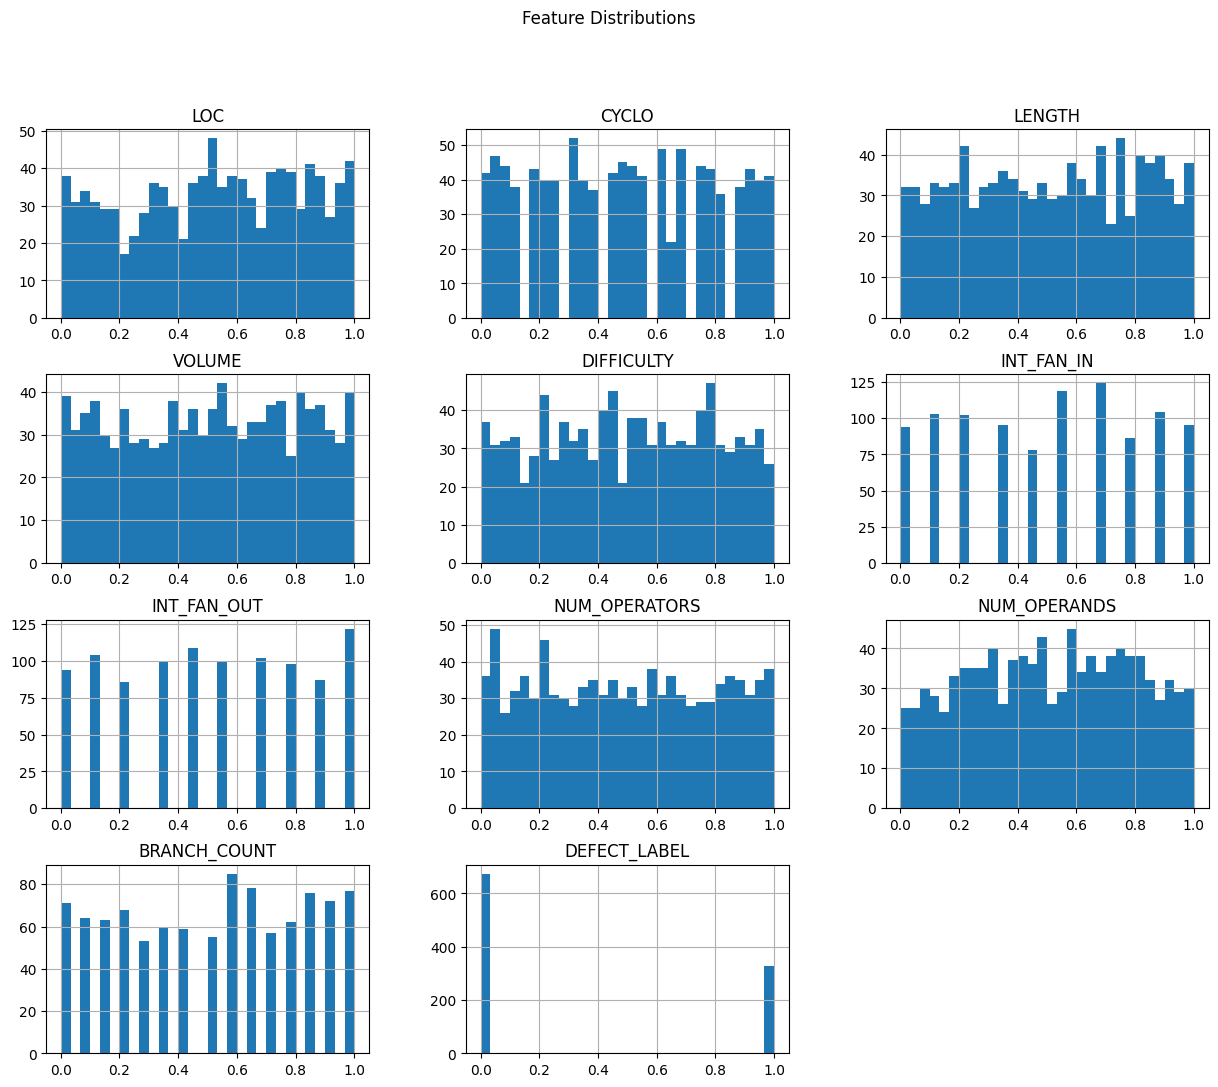

In [9]:
df.hist(figsize=(15, 12), bins=30)
plt.suptitle("Feature Distributions")
plt.show()

Encode Categorical Features

In [10]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

encoder = LabelEncoder()

for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

Split Features & Target

In [11]:
X = df.iloc[:, :-1]
X

,LOC,CYCLO,LENGTH,VOLUME,DIFFICULTY,INT_FAN_IN,INT_FAN_OUT,NUM_OPERATORS,NUM_OPERANDS,BRANCH_COUNT
0,0.779239,0.478261,0.274048,0.544918,0.564121,0.222222,0.444444,0.736196,0.807377,0.642857
1,0.595156,0.608696,0.742561,0.758597,0.450649,0.222222,0.000000,0.576687,0.200820,0.142857
2,0.895502,0.000000,0.968166,0.754277,0.672996,1.000000,0.000000,0.116564,0.020492,0.000000
3,0.782007,0.565217,0.164706,0.017766,0.584106,0.000000,1.000000,0.615542,0.481557,0.500000
4,0.757785,0.217391,0.560900,0.126125,0.526050,0.555556,0.222222,0.656442,0.655738,0.857143
...,...,...,...,...,...,...,...,...,...,...
995,0.577855,0.739130,0.331488,0.091950,0.603102,1.000000,0.444444,0.460123,0.081967,0.214286
996,0.500346,0.304348,0.719031,0.553453,0.511870,0.666667,1.000000,0.010225,0.713115,0.000000
997,0.155017,0.869565,0.843253,0.641748,0.059249,1.000000,0.666667,0.435583,0.848361,0.928571
998,0.367474,0.608696,0.803806,0.703938,0.287075,0.111111,1.000000,0.419223,0.586066,0.500000


In [12]:
y = df.iloc[:, -1]
y

0      0
1      0
2      1
3      0
4      1
      ..
995    0
996    0
997    1
998    1
999    0
Name: DEFECT_LABEL, Length: 1000, dtype: int64

Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Feature Scaling

In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled

array([[ 1.21737349,  1.40230365, -0.28438152, ..., -1.23117788,
         0.67183724, -0.72836304],
       [-1.22323432, -0.6472593 , -0.94244945, ...,  0.33907689,
         0.27748687, -0.49976735],
       [-0.26769063,  1.25590629, -0.48639869, ...,  1.49610671,
        -0.64514418,  0.64321115],
       ...,
       [-1.42060103, -1.37924606,  1.30393318, ..., -1.32759703,
        -0.3921647 , -0.72836304],
       [ 0.77690877, -1.67204077,  1.58216043, ..., -1.38958077,
        -0.5037733 ,  1.10040254],
       [ 0.04520781, -1.23284871,  0.53578403, ...,  1.55120337,
        -0.23591267,  1.55759394]], shape=(200, 10))

In [15]:
X_test_scaled

array([[ 1.21737349,  1.40230365, -0.28438152, ..., -1.23117788,
         0.67183724, -0.72836304],
       [-1.22323432, -0.6472593 , -0.94244945, ...,  0.33907689,
         0.27748687, -0.49976735],
       [-0.26769063,  1.25590629, -0.48639869, ...,  1.49610671,
        -0.64514418,  0.64321115],
       ...,
       [-1.42060103, -1.37924606,  1.30393318, ..., -1.32759703,
        -0.3921647 , -0.72836304],
       [ 0.77690877, -1.67204077,  1.58216043, ..., -1.38958077,
        -0.5037733 ,  1.10040254],
       [ 0.04520781, -1.23284871,  0.53578403, ...,  1.55120337,
        -0.23591267,  1.55759394]], shape=(200, 10))

Linear-regression

In [16]:
model_LR= LinearRegression()
model_LR.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


prediction_model_LR

In [17]:
y_pred_lr = model_LR.predict(X_test_scaled)

print(r2_score(y_test, y_pred_lr))
print(np.sqrt(mean_squared_error(y_test, y_pred_lr)))

-0.022184203801161706
0.47354161349228835


Logistic Regression Model

In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


prediction_model

In [19]:
y_pred_lr = model.predict(X_test_scaled)

print(accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

0.67
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       135
           1       0.00      0.00      0.00        65

    accuracy                           0.67       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.45      0.67      0.54       200



SVM Model

In [20]:
svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


SVM_prediction model

In [21]:
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.675
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       135
           1       0.00      0.00      0.00        65

    accuracy                           0.68       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.46      0.68      0.54       200



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

Confusion Matrices

In [22]:
print(confusion_matrix(y_test, y_pred_lr))

print(confusion_matrix(y_test, y_pred_svm))

[[134   1]
 [ 65   0]]
[[135   0]
 [ 65   0]]


KNN-regression

In [23]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


prediction model-knn

In [24]:
y_pred_knn = knn.predict(X_test_scaled)

print("KNN R2:", r2_score(y_test, y_pred_knn))
print("KNN RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))

KNN R2: -0.18700854700854697
KNN RMSE: 0.5102940328869229


After ML-  process - visulize

ML_RL_visulize

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


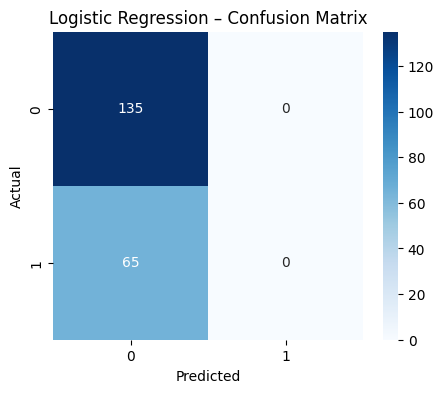

In [25]:
y_pred_lr = model.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ML_Curve

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


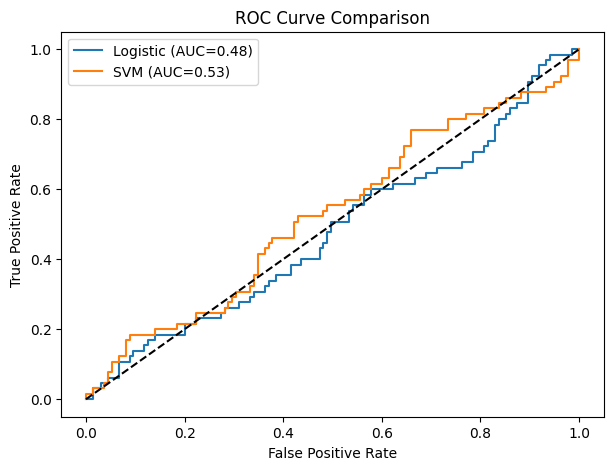

In [26]:
y_prob_lr = model.predict_proba(X_test)[:,1]
y_prob_svm = svm.decision_function(X_test)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

auc_lr = auc(fpr_lr, tpr_lr)
auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(7,5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic (AUC={auc_lr:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC={auc_svm:.2f})")
plt.plot([0,1],[0,1],'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()